# 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 분석을 할 데이터를 불러와 봅시다.
data=pd.read_csv("C:/Users/SAMSUNG/Desktop/python_study/boston.csv")

In [3]:
# 데이터를 확인할 때에는 상위 5개의 row를 추출하여 보여주는 head함수를 사용합시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# Feature Selection

`상관계수`와 `공분산`을 바탕으로 피처를 선택하여 봅시다.

## 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야하는게 사실입니다. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는것이 중요합니다.

In [4]:
# 먼저, 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거합니다.
del data['chas']

In [5]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


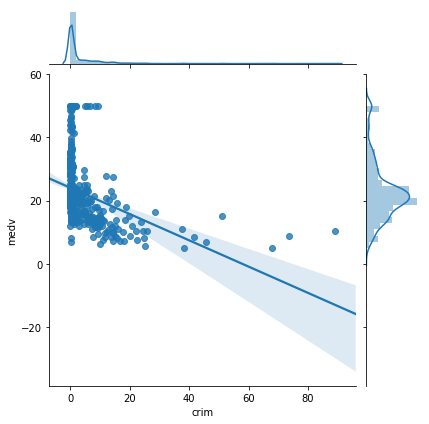

In [6]:
# 실제 집 값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴봅시다.
sns.jointplot(data=data, x='crim', y='medv',kind='regg')
#우하향 하는 그래프, 가설이 맞음.


#### `x.cov(y)`

- 공분산을 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [7]:
# 실제 범죄율과 집 값의 공분산을 확인해봅시다.
data['crim'].cov(data['medv'])

-30.718507964458183

#### `x.corr(y)`

- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [8]:
# 실제 상관계수가 몇인지도 확인해봅시다.
data['crim'].corr(data['medv'])

-0.38830460858681165

## 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

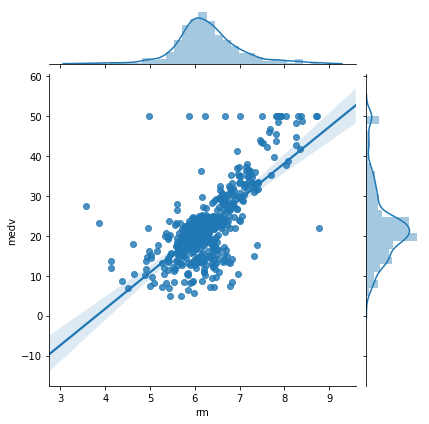

In [9]:
# 방의 개수가 늘어날수록 집 값도 늘어나지 않을까?
sns.jointplot(data=data, x='rm', y='medv', kind='regg')

In [10]:
# 실제 상관계수가 몇인지도 확인해봅시다.
data['rm'].cov(data['medv'])

4.493445879544477

In [11]:
# 위와 같이 공분산도 확인해봅시다.
data['rm'].corr(data['medv'])

0.6953599470715396

#### `sns.heatmap(df, cmap, annot, fmt)`

- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

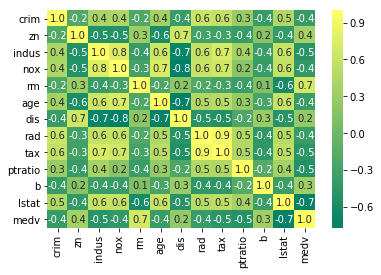

In [12]:
sns.heatmap(data.corr(), cmap='summer', annot=True, fmt='0.1f')

#### `plt.figure(figsize = (가로, 세로))`

- 도화지의 크기 설정

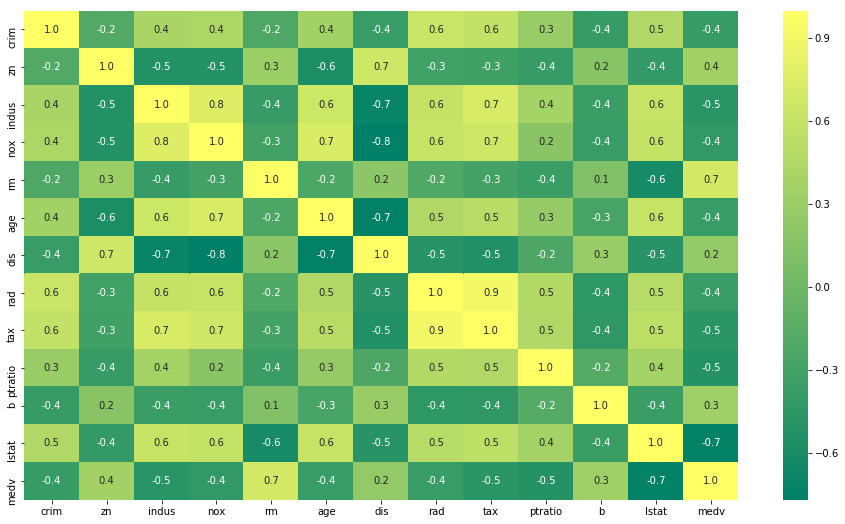

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), cmap='summer', annot=True, fmt='0.1f')

# Feature Extraction

`PCA`를 이용하여 새로운 변수를 만들어보자.

In [14]:
# 변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것 인지 확인해봅시다.
corr_bar=[]


for column in data.columns:
    print(f"{column}의 이름과 집값의 상관관계: {data[column].corr(data['medv'])}")
    corr_bar.append(data[column].corr(data['medv']))

crim의 이름과 집값의 상관관계: -0.38830460858681165
zn의 이름과 집값의 상관관계: 0.36044534245054305
indus의 이름과 집값의 상관관계: -0.48372516002837296
nox의 이름과 집값의 상관관계: -0.42732077237328264
rm의 이름과 집값의 상관관계: 0.6953599470715396
age의 이름과 집값의 상관관계: -0.3769545650045963
dis의 이름과 집값의 상관관계: 0.24992873408590394
rad의 이름과 집값의 상관관계: -0.38162623063977785
tax의 이름과 집값의 상관관계: -0.4685359335677669
ptratio의 이름과 집값의 상관관계: -0.507786685537562
b의 이름과 집값의 상관관계: 0.33346081965706653
lstat의 이름과 집값의 상관관계: -0.7376627261740148
medv의 이름과 집값의 상관관계: 1.0


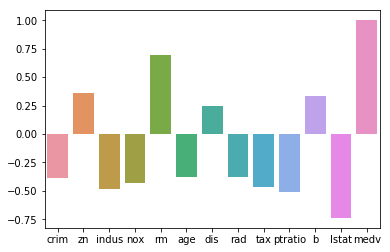

In [15]:
# 앞서 배운 barplot을 통하여 그래프를 그려봅시다.
sns.barplot(data.columns,corr_bar)

In [16]:
# 수치형데이터 중에 비교적 상관계수가 낮은 두개의 변수를 선택해봅시다.
x=data[['dis','b']]
x.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


In [17]:
# PCA를 위한 라이브러리를 불러옵니다.
from sklearn.decomposition import PCA


#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

In [18]:
# 2개의 변수를 조합하여 1개의 변수를 만들어봅시다.
pca=PCA(n_components=1)

In [19]:
# 데이터를 학습시킵니다.
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.components_

array([[-0.00672682, -0.99997737]])

In [21]:
# 새로운 변수에 담긴 각 변수의 분산을 확인할 수 있습니다.

In [22]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.9995135])

In [23]:
# 새로운 변수를 pc1이라는 컬럼에 추가합시다.
data['pc1']=pca.transform(x)

In [24]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-40.227042
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-40.232942
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-36.163035
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-37.970360
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-40.240309


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


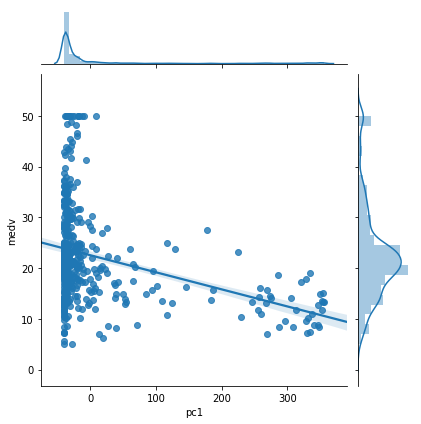

In [25]:
# 새로운 변수와 집 값의 상관관계를 확인해봅시다.
sns.jointplot(data=data, x='pc1', y='medv', kind='regg')

In [26]:
# 상관계수도 확인해봅시다.
data['pc1'].corr(data['medv'])

-0.33348451067418966

# 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아봅시다.

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [27]:
# 정규화에 필요한 라이브러리 입니다.
from sklearn.preprocessing import StandardScaler

In [28]:
# 정규화 객체를 만들어 줍니다.
scaler= StandardScaler()

In [29]:
# x를 학습시킨 후 변형하여 정규환된 x로 만들어 봅니다.
scaler.fit(x)
scaler_x=scaler.transform(x)

### 반복 작업

In [31]:
# PCA의 개수를 찾기
pca=PCA(n_components=1)
# 데이터를 학습
pca.fit(scaler_x)
# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인할 수 있습니다.
pca.components_

array([[-0.70710678, -0.70710678]])

In [33]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.64575584])

In [34]:
# 위와 같이 pc1의 컬럼에 데이터를 넣어봅시다.
data['pc1']=pca.transform(scaler_x)

In [35]:
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-1.073946


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


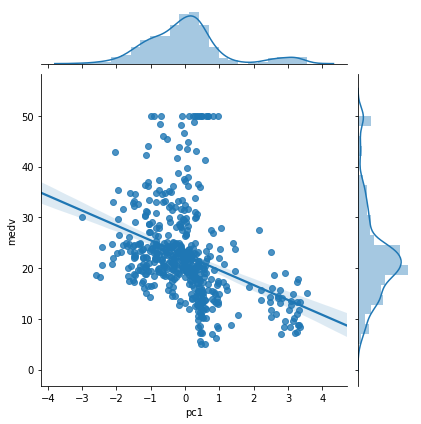

In [36]:
# 새로운 변수와 집 값의 상관관계를 확인해봅시다.
sns.jointplot(data=data, x='pc1', y='medv', kind='regg')

In [37]:
data['pc1'].corr(data['medv'])

-0.3629898510009021